In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
 
#电力数据集做linear regression,target variable 是PE
#C:\Users\Jane\Desktop\desktop\job application\learning materials\data code\Folds.csv
data = pd.read_csv(r'C:\Users\Jane\Desktop\desktop\job application\learning materials\data code\Folds.csv')
data.head()       
 

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [51]:
print(len(data))
data.dropna(axis = 1)
print(len(data))


9568
9568


In [52]:
ndata.median()

AT      23.560
V       60.960
AP    1011.505
RH      70.945
PE     444.380
dtype: float64

In [3]:
data.shape

(9568, 5)

In [4]:
X = data[['AT','V','AP','RH']]
y = data[['PE']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(linreg.intercept_)  #[ 452.50329853]
print(linreg.coef_)       #[[-1.98558313 -0.23170236  0.06410905 -0.15673512]]
print(linreg.intercept_[0])
print(linreg.coef_[0][2]) 

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]
460.05727267468507
0.05685090428567429


In [13]:
#模型拟合测试集
 y_pred = linreg.predict(X_test)
#[[3,1500,8,40]]
#y_pred = linreg.predict([[3,1500,8,40]])
 
 

89.31962415943792


In [ ]:
from sklearn import metrics
#scikit-learn计算MSE RMSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))    #MSE: 19.4303412392
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  #RMSE: 4.4079860752

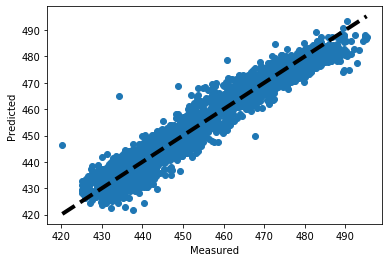

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
#将train dataset分为train+validation,然后再validation上crossvalidation,cross_val_predict会自动分并且做cross validation
X = data[['AT','V','AP','RH']]
y = data[['PE']]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

print("MSE:",metrics.mean_squared_error(y, predicted))  #MSE: 20.7892840922
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))    #RMSE: 4.55952673994

MSE: 20.793672509857537
RMSE: 4.560007950635343
